https://youtu.be/MlP_W-obuNg

# Bisection Method
방정식 $f(x)=0$이 되게 하는 $x$를 찾는 알고리즘

1. 구간 $[a, b]$를 잡는다.
    - $f(a) \times f(b) < 0$. 즉, $f(a)$와 $f(b)$는 서로 다른 부호
2. 양 끝점에 대해 중점 $c=\frac{a+b}{2}$를 계산한다.
    - 만약 $f(a)$와 $f(c)$가 서로 다른 부호라면 $b=c$, 아니면 $a=c$
3. $|f(c)| < \text{tol}$이 될 때까지 반복, `tol`은 허용오차

## 장단점
- 초기 두 점 $a$와 $b$에 대해 함수값의 부호가 서로 다르면 반드시 해를 찾을 수 있다.
- 서로 다른 부호를 위해 두 지점의 간격을 넓히면 계산이 오래 걸린다.
- 상대적으로 다른 방법에 비해 계산 속도가 느리다.

# 코드 구현

In [63]:
class bisection:
    
    def __init__(self, a, b, func, tol=1e-6):
        """
        a, b: 최초 설정 구간
            f(a)*f(b) < 0, a < b
        func: 해를 찾을 함수
        """
        assert (func(a) * func(b) < 0) and (a < b)
        
        self.a = a
        self.b = b
        self.func = func
        self.tol = tol
        
    def solve(self):
        a_history = [self.a]
        b_history = [self.b]
        
        while True:
            c = (self.a + self.b) / 2
            # 허용범위 이내일 때
            if abs(self.func(c)) <= self.tol:
                self.solution = c
                self.history = [(a, b) for (a, b) in zip(a_history, b_history)]
                return c
            
            # f(a)와 f(c)가 서로 다른 부호인 경우
            elif self.func(self.a) * self.func(c) < 0:
                self.b = c
                
            # f(a)와 f(c)가 서로 같은 부호인 경우
            else:
                self.a = c
            
            
            a_history.append(self.a)
            b_history.append(self.b)

In [57]:
import math

def f(x):
    return math.sin(math.cos(math.exp(x)))

In [58]:
import matplotlib.pyplot as plt
import numpy as np

xs = np.arange(-2, 2+0.01, 0.01)
ys = np.array([f(x) for x in xs])

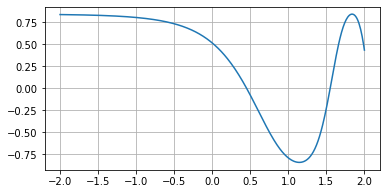

In [59]:
plt.figure(figsize=(6, 3))
plt.plot(xs, ys)
plt.grid()
plt.show()

In [64]:
BM = bisection(a=-1, b=1.5, func=f)

In [65]:
BM.solve()

0.4515829086303711

In [66]:
BM.history

[(-1, 1.5),
 (0.25, 1.5),
 (0.25, 0.875),
 (0.25, 0.5625),
 (0.40625, 0.5625),
 (0.40625, 0.484375),
 (0.4453125, 0.484375),
 (0.4453125, 0.46484375),
 (0.4453125, 0.455078125),
 (0.4501953125, 0.455078125),
 (0.4501953125, 0.45263671875),
 (0.451416015625, 0.45263671875),
 (0.451416015625, 0.4520263671875),
 (0.451416015625, 0.45172119140625),
 (0.451568603515625, 0.45172119140625),
 (0.451568603515625, 0.4516448974609375),
 (0.451568603515625, 0.45160675048828125),
 (0.451568603515625, 0.4515876770019531),
 (0.45157814025878906, 0.4515876770019531)]

In [101]:
len(BM.history)

22

In [67]:
f(BM.solution)

-3.194071968524581e-07

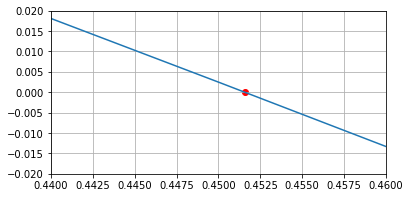

In [72]:
plt.figure(figsize=(6, 3))
plt.plot(xs, ys)
plt.grid()
plt.xlim((0.44, 0.46))
plt.ylim((-0.02, 0.02))
plt.scatter(BM.solution, 0, color='r')
plt.show()

In [93]:
def g(x):
    return math.sinh(math.cosh(x)-2) - 1

In [94]:
xs = np.arange(-2, 2+0.01, 0.01)
ys = np.array([g(x) for x in xs])

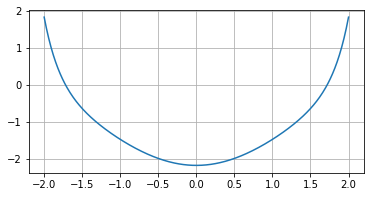

In [95]:
plt.figure(figsize=(6, 3))
plt.plot(xs, ys)
plt.grid()
plt.show()

In [97]:
BM = bisection(a=0, b=2, func=g)

In [98]:
BM.solve()

1.7198433876037598

In [99]:
g(BM.solution)

6.69221502658246e-07